In [34]:
import numpy as np
import matplotlib.pyplot as plt 

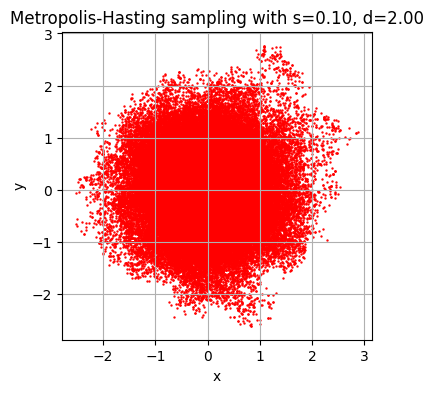

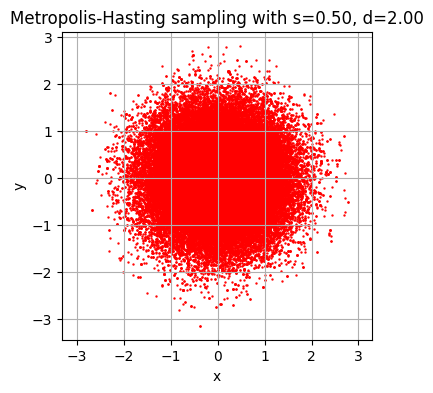

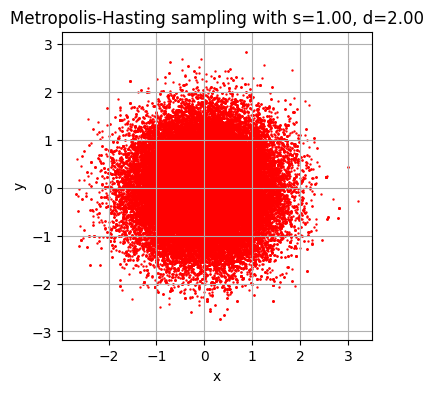

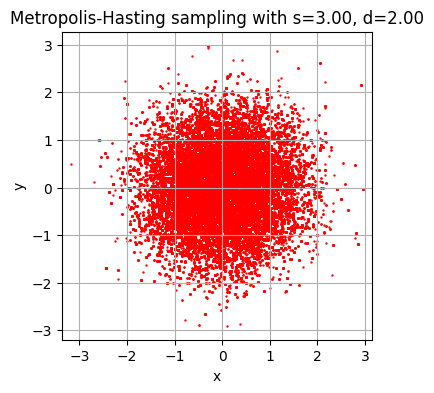

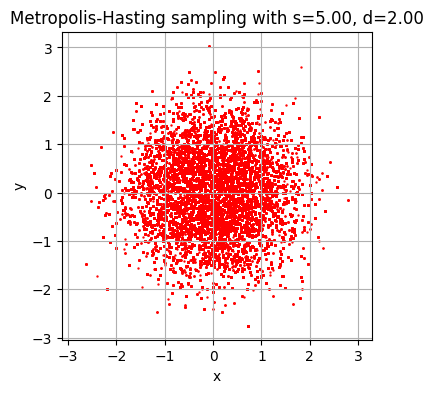

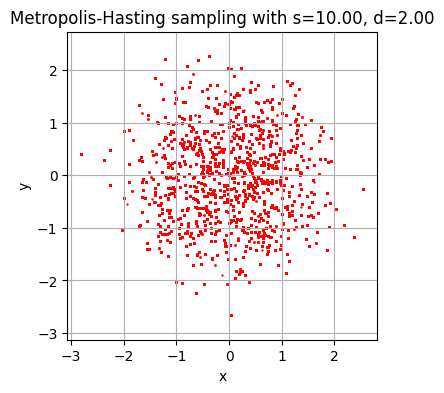

In [38]:
def MH(d, s, n, per_all = True):

    sample_res = np.zeros((n, d))

    for i in range(1, n):
        xi1 = sample_res[i-1]

        # Perturbation on all dimensions
        if per_all:
            per = np.random.normal(0, s, d)
            yi = xi1 + per
            acc = np.exp(-(yi ** 2 - xi1 ** 2).sum())
            if np.random.rand() < acc:
                xi1 = yi
        # Perturbation on only one dimension
        else:
            for j in range(d):
                yi = xi1.copy()
                yi[j] += np.random.normal(0, s)
                acc = np.exp(-(yi ** 2 - xi1 ** 2).sum())
                if np.random.rand() < acc:
                    xi1 = yi
        sample_res[i] = xi1
    return sample_res


# Parameters
d = 2 
Ss = [.1 , .5 , 1 , 3 , 5 , 10]
n = int(1e5)

for s in Ss:
    samples = MH(d, s, n, per_all = True)
    plt.figure(figsize=(4,4))
    plt.grid()
    plt.axis('equal')
    plt.scatter(samples[:, 0], samples[:, 1], s=.5, c = 'r')
    plt.title(f'Metropolis-Hasting sampling with s={s:.2f}, d={d:.2f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig(f'2d_s={s:.2f}_d={d:.2f}.pdf',format = 'pdf')
    plt.show()
